In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle


In [ ]:
#Checking if GPU is working
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


***************
Preprocess

In [ ]:
data_dir = r" Location of images " #Directory of train data set
train_data = []
labels = ["cannon", "cellphone"] #Labels

for label in labels:
  path = os.path.join(data_dir,label) #gets images location 
  label_num = labels.index(label) # to tag images with their labels
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path, img)) #read
    new_array = cv.resize(img_array,(128,128))    #resize
    train_data.append([new_array, label_num])     # [image, label] array

81


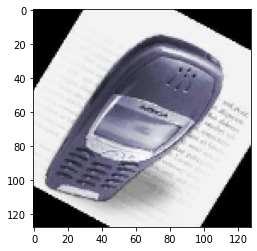

In [ ]:
print(len(train_data))
plt.imshow(train_data[80][0])

In [ ]:
print(train_data[80][0].shape)

(128, 128, 3)


In [ ]:
# vectorize data
input_data = []
for image in range(len(train_data)):
  input_data.append([train_data[image][0].flatten(), train_data[image][1]])

In [ ]:
input_data[80][0].shape

(49152,)

In [ ]:
# adding 1 for bias value to images
z = np.ones((1,1), dtype=np.uint8)
for x in range(len(input_data)):
  input_data[x][0] = np.append(input_data[x][0], 1)

In [ ]:
input_data[80][0]

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
input_data[80][0].shape

(49153,)

In [ ]:
#creating weights
weights = np.random.rand(49153,)

In [ ]:
weights = weights/1000 #Had to reduce values otherwise softplus() returns NaN values because of large values

In [ ]:
weights.shape

(49153,)

In [ ]:
#required variables
t = []
vector_without_labels = []
rho = 0.0005
iterNo = 1000

#Seperating input and labels to 2 different variable
for image in range(len(input_data)):
  vector_without_labels.append(input_data[image][0])
for image in range(len(input_data)):
  t.append(input_data[image][1])
len(t)
type(vector_without_labels)
np_t = np.array(t)
np_vector = np.array(vector_without_labels)

In [ ]:
np_vector = np_vector/1000 #Had to reduce values otherwise dmish() returns NaN values because of large values
print(np_vector)
print(np_t)

[[0.224 0.148 0.1   ... 0.084 0.067 0.001]
 [0.019 0.005 0.008 ... 0.114 0.116 0.001]
 [0.099 0.163 0.127 ... 0.233 0.226 0.001]
 ...
 [0.    0.    0.    ... 0.    0.    0.001]
 [0.    0.    0.    ... 0.    0.    0.001]
 [0.    0.    0.    ... 0.    0.    0.001]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [ ]:
np_vector.shape

(81, 49153)

*********************************
Training Perceptron

In [ ]:
def tanh(x):
 return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
def softplus(x):
 return np.log(1 + np.exp(x))
def mish(x):
 return x * tanh(softplus(x))
def dmish(x):
 omega = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
 delta = 1 + pow((np.exp(x) + 1), 2)
 derivative = np.exp(x) * omega / pow(delta, 2)
 return derivative


In [ ]:
len(np_vector)

81

In [ ]:
def trainPerceptron(inputs, t, weights, rho, iterNo):
  
  for iteration in range(iterNo):
    for i in range(len(inputs)):
      inputs, t = shuffle(inputs, t) 
      #feed forward
      sum = np.dot(inputs[i, :], weights)
      output = mish(sum)
      #back propagation
      error = t[i] - output
      gradient = rho * error * dmish(output) * inputs[i, :]
      weights = weights + gradient
    print(weights)
  
  return weights
  


In [ ]:
result_Weights = trainPerceptron(np_vector, np_t, weights, rho, iterNo) 
np.save('weightsSave.npy', result_Weights)

print(weights)
print(result_Weights)

[-0.00019866 -0.00055604 -0.00037956 ... -0.00036099 -0.00030933
  0.00087111]
[-0.00043961 -0.00078764 -0.0006023  ... -0.0005616  -0.00052863
  0.00087274]
[-0.00050682 -0.00085469 -0.00066678 ... -0.00063036 -0.00061108
  0.00087435]
[-0.00063246 -0.00098861 -0.00080515 ... -0.00076685 -0.0007627
  0.00087612]
[-0.00064934 -0.00099627 -0.00082119 ... -0.00078613 -0.00079564
  0.00087721]
[-0.00065127 -0.00099652 -0.00082891 ... -0.00080419 -0.00082366
  0.00087775]
[-0.00064392 -0.00098927 -0.00082898 ... -0.00080569 -0.00083867
  0.00087926]
[-0.00067056 -0.00102106 -0.00086063 ... -0.00084847 -0.00089936
  0.00088001]
[-0.00069178 -0.00104282 -0.00088777 ... -0.00085149 -0.00091262
  0.0008814 ]
[-0.00067714 -0.00102285 -0.0008797  ... -0.00085002 -0.00091602
  0.00088212]
[-0.00069987 -0.00105147 -0.00091022 ... -0.00086198 -0.00092904
  0.00088311]
[-0.00069896 -0.00105869 -0.00091964 ... -0.00087295 -0.00095042
  0.00088458]
[-0.00069252 -0.00104682 -0.00091312 ... -0.00084993 

*************************************
Test data preparation

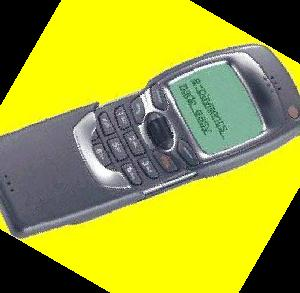

In [ ]:
weight_final = np.load('weightsSave.npy')
test_img_path = "/content/drive/MyDrive/HW2Data/test/cellphone/image_0035.jpg"
img_test = cv.imread(test_img_path)
cv2_imshow(img_test)

In [ ]:
len(weight_final)

49153

In [ ]:
#Same preprocess as train data
test_data_dir = r"/content/drive/MyDrive/HW2Data/test/"
test_data = []
test_Label = []
#labels = ["cannon", "cellphone"]

for label in labels:
  test_path = os.path.join(test_data_dir,label)
  label_num = labels.index(label)
  for img in os.listdir(test_path):
      test_img_array = cv.imread(os.path.join(test_path, img))
      new_test_array = cv.resize(test_img_array,(128,128))
      test_data.append(new_test_array.flatten())
      test_Label.append(label_num)

z = np.ones((1,1), dtype=np.uint8)
for x in range(len(test_data)):
  test_data[x] = np.append(test_data[x], 1)

In [ ]:
test_data = np.array(test_data)
test_data = test_data/100
test_data

array([[0.45, 0.8 , 0.86, ..., 1.64, 1.46, 0.01],
       [0.7 , 0.75, 0.9 , ..., 1.36, 1.55, 0.01],
       [2.54, 2.53, 2.55, ..., 2.55, 2.52, 0.01],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [ ]:
test_Label

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
def testPerceptron(sample_test, weights):

  y_Actual = []
  y_Prediction = []

  for img in range(len(sample_test)):
    y_Actual.append(test_Label[img]) # actual label list
    sum = np.dot(sample_test[img], weights) 
    y = mish(sum)
    if y>= 1:
      y_Prediction.append(1)
    else:
      y_Prediction.append(0)


  return y_Actual, y_Prediction
  


In [ ]:
y_Actual, y_Prediction = testPerceptron(test_data, weight_final)

In [ ]:
print("Label: ",y_Actual)
print("Prediction:", y_Prediction)

Label:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Prediction: [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
acc = accuracy_score(y_Actual, y_Prediction)
conf = confusion_matrix(y_Actual, y_Prediction)
print("Matrix:\n",  conf)
print("Accuracy: ", acc)

Matrix:
 [[4 1]
 [0 7]]
Accuracy:  0.9166666666666666
